# **Predicting Loan Default Risk**

![text](Loan_default.jpg)

# **Project Overview**
Accurately predicting loan defaults is crucial for both lenders and borrowers. For lenders, it safeguards assets and ensures financial stability, while borrowers gain access to fair lending practices and credit under favorable terms.

This project explores the creation of a machine learning models aimed at predicting the risk of loan defaults.

# **Business Understanding**
Loan default prediction plays a vital role in the lending process, enabling lenders to evaluate the risk of borrowers failing to repay their loans. By examining factors such as income, credit history, Work Experience, and economic trends, this project aims to enable lenders decide on the best model to mitigate risks and reduce potential losses.

# **Data Understanding**
Data Source: https://www.kaggle.com/datasets/yaminh/applicant-details-for-loan-approve
This dataset provides insights into various attributes of loan applicants in india, essential for assessing their eligibility for loan approval.
It includes details such as annual income, age, work experience, marital status and more. It is designed to support loan approval processes by offering insights into applicant profiles aiding in risk assessment and facilitating informed lending decisions.

Here's a brief explanation of each column:

    1-Applicant_ID: Unique identifier for each loan applicant.
    2-Annual_Income: Annual income of the loan applicant.
    3-Applicant_Age: Age of the loan applicant.
    4-Work_Experience: Number of years of work experience of the loan applicant.
    5-Marital_Status: Marital status of the loan applicant.
    6-House_Ownership: Ownership status of the applicant's residence.
    7-Vehicle_Ownership(car): Ownership status of the applicant's vehicle.
    8-Occupation: Profession or occupation of the loan applicant.
    9-Residence_City: City where the loan applicant resides.
    10-Residence_State: State where the loan applicant resides.
    11-Years_in_Current_Employment: Number of years the applicant has been in their current job.
    12-Years_in_Current_Residence: Number of years the applicant has been residing in their current residence.
    13-Loan_Default_Risk: Indicator of loan default risk, with values indicating whether the loan applicant is at risk of defaulting on the loan.

### Loading and Exploring the Dataset

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [24]:
#load dataset
df = pd.read_csv('Applicant-details.csv')
df.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), ob

In [26]:
df.describe()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Data Preprocessing
At this stage, we will address missing values and duplicates in the dataset, ensuring they are handled appropriately. Categorical variables will be encoded using LabelEncoder, while numerical features will be prepared for further analysis.

In [27]:
#Checking for duplicates

duplicate_df = df[df.duplicated()]
print("Duplicate rows:", duplicate_df)

Duplicate rows: Empty DataFrame
Columns: [Applicant_ID, Annual_Income, Applicant_Age, Work_Experience, Marital_Status, House_Ownership, Vehicle_Ownership(car), Occupation, Residence_City, Residence_State, Years_in_Current_Employment, Years_in_Current_Residence, Loan_Default_Risk]
Index: []


The above results shows that there are no duplicate values

#### Encode categorical values for further processing.
The categorical variables will be transformed

In [28]:
#creating copy of the dataframe for preprocessing
df_new = df.copy()

#Encode categorical variables

label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# The categorical variables have been transformed this returns a snippet of the new data frame.
df_new.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


### Exploratory Data Analysis and Visualization

Visualizing the correlation matrix of numerical features using a heatmap to understand the relationships between the variables

In [29]:
# selecting of numerical features
numerical_df = df_new.select_dtypes(include=['number'])

#Calculating correlation matrix
correlation = numerical_df.corr()
correlation

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
Applicant_ID,1.000000,-0.002298,-0.000809,0.000498,0.000837,0.001772,-0.021853
Annual_Income,-0.002298,1.000000,-0.001025,0.007233,0.009235,-0.003549,-0.003692
Applicant_Age,-0.000809,-0.001025,1.000000,0.000277,0.004643,-0.026127,-0.022074
Work_Experience,0.000498,0.007233,0.000277,1.000000,0.641511,0.022818,-0.026859
Years_in_Current_Employment,0.000837,0.009235,0.004643,0.641511,1.000000,0.005723,-0.004657
Years_in_Current_Residence,0.001772,-0.003549,-0.026127,0.022818,0.005723,1.000000,-0.003838
Loan_Default_Risk,-0.021853,-0.003692,-0.022074,-0.026859,-0.004657,-0.003838,1.000000


### Correlation Heatmap Visualization

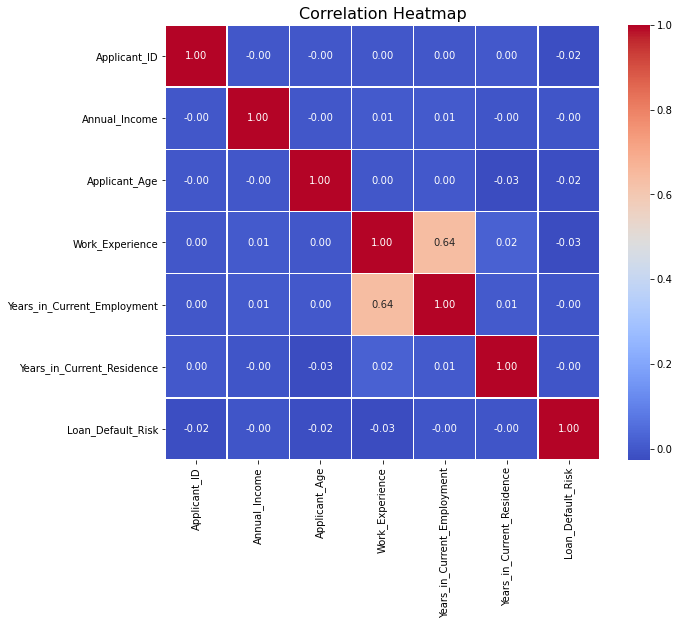

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidth=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Observations and Interpretations
The heatmap represents matrix of numerical features in the dataset. The colors indicate the strength and direction between variables i.e Dark colors signify stronger correlations while lighter colors suggest weaker or no correlation

1. Diagonal Values (Correlation of 1.0):
   The diagonal elements represent the correlation of a variable with itself, so the value is always 1.0.

2. High Correlation (e.g., Annual_Income and Years_in_Current_Employment with 0.64):
   This indicates a moderate positive relationship. As "Years_in_Current_Employment" increases, "Annual_Income" tends to increase as well.
   
3. Weak Correlation:
   Most other variables show weak or no correlation (values close to 0), suggesting limited linear relationships among them.

4. Loan_Default_Risk Correlation:
   The "Loan_Default_Risk" variable shows low correlations with all other features, suggesting no strong linear relationship with any single predictor.
   This analysis implies that while some features may have moderate relationships with each other, no single variable has a significant linear correlation with loan default risk, emphasizing the importance of using more complex models for prediction.

### Model Building
The idea is to utilize Random Forest Classifier, Decision Tree and Logistic regression which are all used in classification tasks.

Features: These refer to the various attributes or characteristics of a borrower that shall be used as inputs in the predictive model. Examples include factors such as borrower's income, credit score, employment status, debt-to-income ratio, loan amount and other relevant financial and personal information.

Target Variable: This is the outcome variable that the model aims to predict, which is whether or not a borrower will default on their loan. This variable is binary, where 1 indicates loan default (high risk) and 0 indicates no default (low risk). 

In [31]:
#Split the data into features (X) and target variable (y)
X = df_new.drop('Loan_Default_Risk', axis=1)
y = df['Loan_Default_Risk']

#Split data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Preprocessing and Transformations
1. Preprocessing steps for numerical and categorical features are defined using Pipeline.
2. ColumnTransformer is used to apply different transformations to numerical and categorical features


In [32]:
#preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64','float64']).columns
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())])
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

### 1. Using Random Forest Classifier
We are choosing to use the random forest classifier because of its ability to perform well especially where the relationships between the features and target variable are non - linear
1. Pipeline is created to integrate preprocessing and model training.
2. The model is trained on the training data and evaluated on the testing data using accuracy as the metric

In [33]:
#Define Classfier
classifier = RandomForestClassifier()

#create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])

#Fit the model
pipeline.fit(X_train, y_train)

#Predict
y_pred = pipeline.predict(X_test)

#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9337

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17447
           1       0.75      0.72      0.73      2553

    accuracy                           0.93     20000
   macro avg       0.86      0.84      0.85     20000
weighted avg       0.93      0.93      0.93     20000



### Performance metric evaluations
The Random Forest model shows good overall performance with an accuracy of 93.37%. Here's a summary of the key metrics:

Strengths:
Low-Risk Cases (Class 0):
High precision (96%), recall (97%), and F1-score (96), indicating excellent performance in identifying low-risk borrowers.

Weaknesses:
High-Risk Cases (Class 1):
Moderate precision (75%) and recall (72%), meaning the model misses about 28% of high-risk cases and misclassifies some low-risk cases as high-risk.

Implications:
The model excels at identifying low-risk borrowers, but improvements are needed for detecting high-risk cases, which are essential for minimizing loan defaults.

Recommendations:
Techniques like class balancing, oversampling to improve recall for high-risk borrowers.


### Feature Importance 

Top 10 Features Influencing Loan Default Risk:
                           Feature  Importance
0                     Applicant_ID    0.248408
1                    Annual_Income    0.070073
2                    Applicant_Age    0.060925
3                  Work_Experience    0.049844
4      Years_in_Current_Employment    0.047034
5       Years_in_Current_Residence    0.037545
7            Marital_Status_single    0.005131
6           Marital_Status_married    0.005112
383          Residence_State_Bihar    0.004457
406  Residence_State_Uttar_Pradesh    0.004392


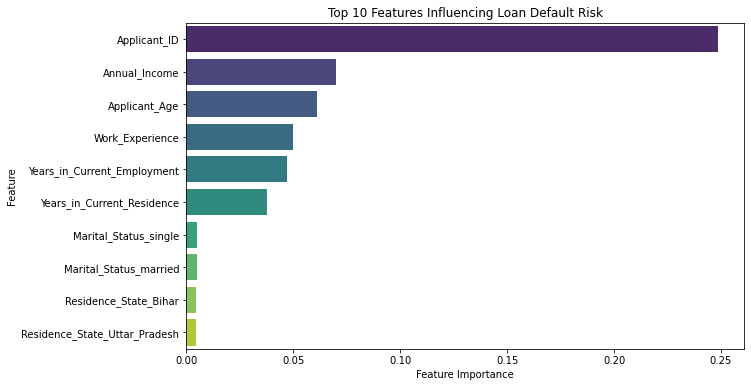

In [34]:
# Get feature importances from the Random Forest model
feature_names = list(numeric_features) + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features))
importances = pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display top features
print("Top 10 Features Influencing Loan Default Risk:")
print(importances_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Features Influencing Loan Default Risk")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


Key Observations

Top Feature - Applicant_ID (Importance: 0.252702):
This feature doesn't represent meaningful data and should not be prioritized while building the model in production.

Significant Features:

Annual_Income (Importance: 0.070205):
Higher income may reduce default risk, reflecting financial stability.

Applicant_Age (Importance: 0.059605):
Older applicants might default less due to financial maturity or more stable employment.

Work_Experience (Importance: 0.047731):
More work experience can imply a stable income, reducing default risk.

Years_in_Current_Employment & Years_in_Current_Residence:
Longer durations in employment or residence likely indicate stability, lowering default probabilities.

Lower Importance Features:

Marital_Status_married & Marital_Status_single:
These have minimal influence, suggesting marital status may not be a major determinant of default risk in this dataset.

Residence_State (e.g., Uttar Pradesh, West Bengal):
These features have low importance, but they might capture some regional socio-economic patterns.

### 2. Using DecisionTree Classifier

In [35]:


# Define Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Create a pipeline for Decision Tree
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', decision_tree_classifier)])

# Fit the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Predict using Decision Tree
y_pred_dt = dt_pipeline.predict(X_test)

# Accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:", accuracy_dt)

# Classification report for Decision Tree
print('\nDecision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.89295

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     17447
           1       0.58      0.57      0.57      2553

    accuracy                           0.89     20000
   macro avg       0.76      0.75      0.76     20000
weighted avg       0.89      0.89      0.89     20000


Performance Comparison:
Random Forest Accuracy: 0.93
Decision Tree Accuracy: 0.89


### Performance Metric Evaluation
The Decision Tree model has an accuracy of 89.3%, with strong performance for low-risk borrowers but poor results for high-risk borrowers.

Strengths:
Low-risk cases (Class 0): High precision (94%) and recall (94%), showing excellent performance in identifying low-risk borrowers.

Weaknesses:
High-risk cases (Class 1): Low precision (58%) and recall (57%), meaning the model misses many high-risk borrowers and misclassifies some low-risk cases as high-risk.

Business Implications:
The model performs well for low-risk borrowers but has a significant gap in detecting high-risk borrowers, which could lead to missed opportunities for managing loan defaults.

Recommendation:
Techniques like class balancing, threshold adjustment to improve recall for high-risk cases.

In [ ]:


# Define Logistic Regression Classifier
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline for Logistic Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logistic_regression)])

# Fit the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_lr = lr_pipeline.predict(X_test)

# Accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Accuracy:", accuracy_lr)

# Classification report for Logistic Regression
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.8724

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     17447
           1       1.00      0.00      0.00      2553

    accuracy                           0.87     20000
   macro avg       0.94      0.50      0.47     20000
weighted avg       0.89      0.87      0.81     20000


Performance Comparison:
Random Forest Accuracy: 0.93
Decision Tree Accuracy: 0.89
Logistic Regression Accuracy: 0.87


### Performance Metric Evaluation
The Logistic Regression model achieves 87.24% accuracy, performing well for low-risk cases but completely failing to detect high-risk cases.

Strengths:
Low-risk cases (Class 0): Perfect recall (100%) and strong overall performance.

Weaknesses:
High-risk cases (Class 1): Recall is 0%, meaning the model fails to identify any high-risk borrowers.

Business Implications:
While effective for identifying low-risk borrowers, the model's inability to detect high-risk cases poses a significant risk of undetected loan defaults.

Recommendations:
Class imbalance can be addressed with oversampling or class weighting.
Adjusting the classification threshold to improve sensitivity to high-risk cases.
Exploring advanced algorithms like Gradient Boosting for better performance.


Conclusion

Preffered Model: Random Forest
Given its high accuracy (0.93), strong recall for class 1 (0.72) and balanced performance across both classes, Random Forest should be chosen as the primary model for predicting loan default risk.
It provides the best trade off between precision and recall, especially for the minority class (1).

By prioritizing Random Forest while addressing class imbalance, the solution will be the robust, accurate and better suited for identifying loan defaults.